When benchmarking you **MUST**

1. close all applications
2. close docker
3. close all but this Web windows
4. all pen editors other than jupyter-lab (this notebook)


In [1]:
import os
from cloudmesh.common.Shell import Shell
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
from tqdm.notebook import tqdm
from cloudmesh.common.util import readfile
from cloudmesh.common.util import writefile
from cloudmesh.common.StopWatch import StopWatch 

sns.set_theme(style="whitegrid")

/home/green/ENV3/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
user = "gregor"
node = "alienware"

processors = 32
experiments = 10
maximum = 1024 * 100000
intervals = 10

In [3]:
label = f"{user}-{node}-{processors}"
output = f"benchmark/{user}"

delta = int(maximum / intervals)

totals = [64] + list(range(0,maximum, delta))[1:]
points = [int(t/processors) for t in totals]
print (totals)
print(points)

[64, 10240000, 20480000, 30720000, 40960000, 51200000, 61440000, 71680000, 81920000, 92160000]
[2, 320000, 640000, 960000, 1280000, 1600000, 1920000, 2240000, 2560000, 2880000]


In [14]:
systeminfo = StopWatch.systeminfo()
writefile(f"benchmark/{label}-sysinfo.log", systeminfo)
print (systeminfo)

+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | hirsute                                                          |
| DISTRIB_DESCRIPTION | "Ubuntu 21.04"                                                   |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 21.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           |

In [5]:
df = pd.DataFrame(
{"Size": points}
)
df = df.set_index('Size')

In [6]:
os.makedirs(output, exist_ok=True)

experiment_progress = tqdm(range(0, experiments), desc ="Experiment")

experiment = -1
for experiment in experiment_progress:
    exoeriment = experiment + 1

    label="gregor-mac"
    log = f"{output}/{label}-{experiment}-log.log"
    os.system(f"rm {log}")


    name = points[experiment]
    progress = tqdm(range(0, len(points)), 
                    desc =f"Benchmark {name}",
                    bar_format="{desc:<30} {total_fmt} {r_bar}")
    
    i = -1
    for state in progress:
        i = i + 1
        n = points[i]
        command = f"mpiexec -n {processors} python count-click.py " + \
                  f"--n {n} --max_number 10 --find 8 --label {label} " + \
                  f"--user {user} --node={node} " + \
                  f"{log}"
        os.system (command)

    content = readfile(log).splitlines()
    lines = Shell.cm_grep(content, "csv,Result:")
    # print(lines)
    values = []
    times = []

    for line in lines:
        msg = line.split(",")[7]
        t = line.split(",")[4]

        total, overall, trials, find, label = msg.split(" ")
        values.append(int(overall))
        times.append(float(t))
        # print (t, overall)


    #data = pd.DataFrame(values, times, columns=["Values", "Time"])

    #print (data.describe())
    #sns.lineplot(data=data, palette="tab10", linewidth=2.5)
    # df["Size"] = values
    df[f"Time_{experiment}"] = times
    # print(df)


Experiment:   0%|          | 0/10 [00:00<?, ?it/s]

Benchmark 2                    10 | 0/10 [00:00<?, ?it/s]

Benchmark 320000               10 | 0/10 [00:00<?, ?it/s]

Benchmark 640000               10 | 0/10 [00:00<?, ?it/s]

Benchmark 960000               10 | 0/10 [00:00<?, ?it/s]

Benchmark 1280000              10 | 0/10 [00:00<?, ?it/s]

Benchmark 1600000              10 | 0/10 [00:00<?, ?it/s]

Benchmark 1920000              10 | 0/10 [00:00<?, ?it/s]

Benchmark 2240000              10 | 0/10 [00:00<?, ?it/s]

Benchmark 2560000              10 | 0/10 [00:00<?, ?it/s]

Benchmark 2880000              10 | 0/10 [00:00<?, ?it/s]

In [7]:

df = df.rename_axis(columns="Time")
df
    

Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
2,0.095,0.087,0.087,0.195,0.080,0.123,0.063,0.082,0.114,0.123
320000,0.605,0.777,0.766,0.693,0.674,0.686,0.657,0.503,0.717,0.624
640000,1.153,1.088,1.106,1.264,1.113,1.012,0.919,1.179,1.154,1.088
960000,1.545,1.661,1.527,1.558,1.641,1.519,1.540,1.740,1.656,1.721
1280000,2.159,2.075,2.097,2.555,2.299,1.935,2.061,2.128,2.074,2.392
1600000,2.578,2.538,2.510,2.859,2.614,2.329,2.459,2.515,2.669,2.520
1920000,3.166,3.108,3.064,3.017,3.157,4.010,2.802,3.319,2.981,3.075
2240000,3.678,3.657,3.497,3.524,3.686,3.330,4.647,3.604,3.693,3.809
2560000,3.889,4.002,3.952,4.127,3.744,3.702,3.958,4.012,4.093,3.950


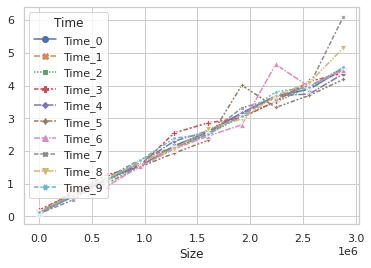

In [8]:
sns.lineplot(data=df, markers=True);

In [9]:
plt.savefig(f'{output}/{label}-line.png');
plt.savefig(f'{output}/{label}-line.pdf');

<Figure size 432x288 with 0 Axes>

In [10]:
dfs = df.stack().reset_index()
dfs = dfs.set_index('Size')
dfs = dfs.drop(columns=['Time'])
dfs = dfs.rename(columns={0:'Time'})
dfs

,Time
Size,
2,0.095
2,0.087
2,0.087
2,0.195
2,0.080
...,...
2880000,4.189
2880000,4.489
2880000,6.103


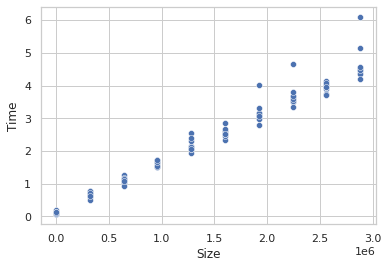

In [11]:
sns.scatterplot(data=dfs, x="Size", y="Time");
plt.savefig(f"{output}/{label}-scatter.pdf")
plt.savefig(f"{output}/{label}-scatter.png")

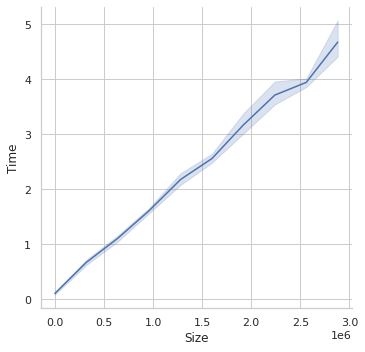

In [12]:
sns.relplot(x="Size", y="Time", kind="line", data=dfs);
plt.savefig(f"{output}/{label}-relplot.pdf")
plt.savefig(f"{output}/{label}-relplot.png")

In [13]:
df.to_pickle(f"{output}/{label}-df.pkl")